# Check whether new initial and boundary conditions are reasonable

In [1]:
import xarray as xr
import numpy as np
import cmocean
import sys
sys.path.append('/home/users/birgal/')
import pickle

In [2]:
base_folder = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'

nemo_mesh = xr.open_dataset(f'{base_folder}bathymetry/mesh_mask-20240305.nc').isel(time_counter=0)

ens='1011.001'

cesm2_icT = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens{ens}_ICs_ConsTemp_y1850.nc').isel(time_counter=0)
cesm2_orT = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-{ens}.pop.h.TEMP.185001-185912.nc').isel(time=0)
cesm2_icS = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens{ens}_ICs_AbsSal_y1850.nc').isel(time_counter=0)
cesm2_orS = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-{ens}.pop.h.SALT.185001-185912.nc').isel(time=0)

In [11]:
cesm2_ic1 = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens1011.001_ICs_ConsTemp_y1850.nc').isel(time_counter=0)
cesm2_ic2 = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens1031.002_ICs_ConsTemp_y1850.nc').isel(time_counter=0)

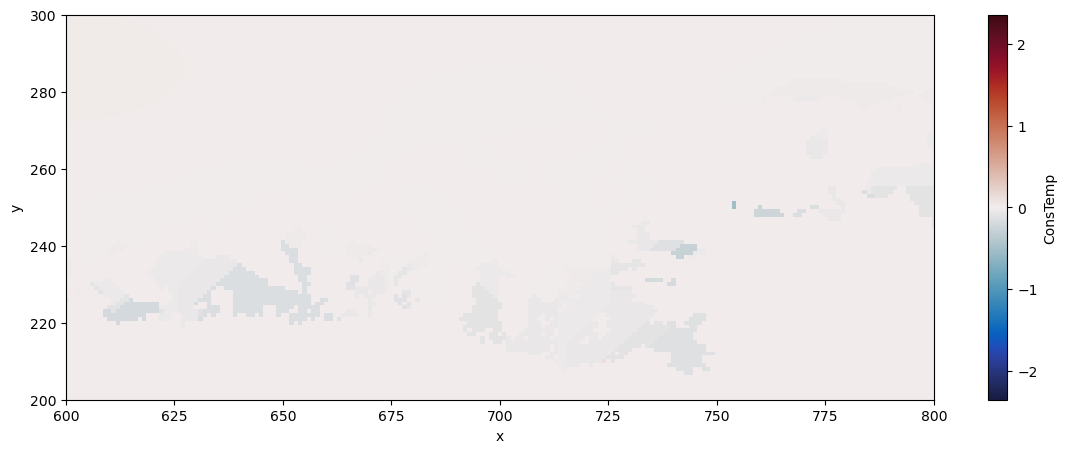

In [14]:
(cesm2_ic1-cesm2_ic2)['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

In [18]:
nemo_mesh.nav_lev.isel(nav_lev=52).values

array(530.8942, dtype=float32)

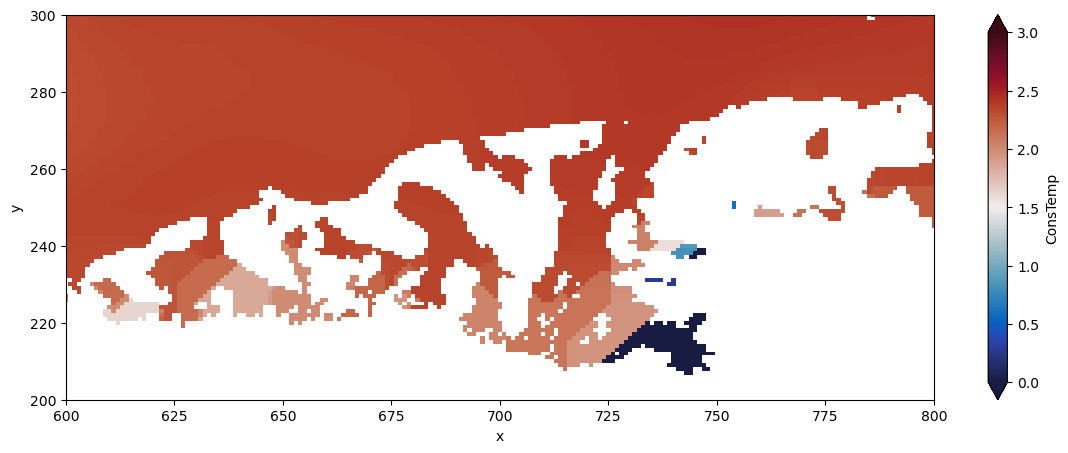

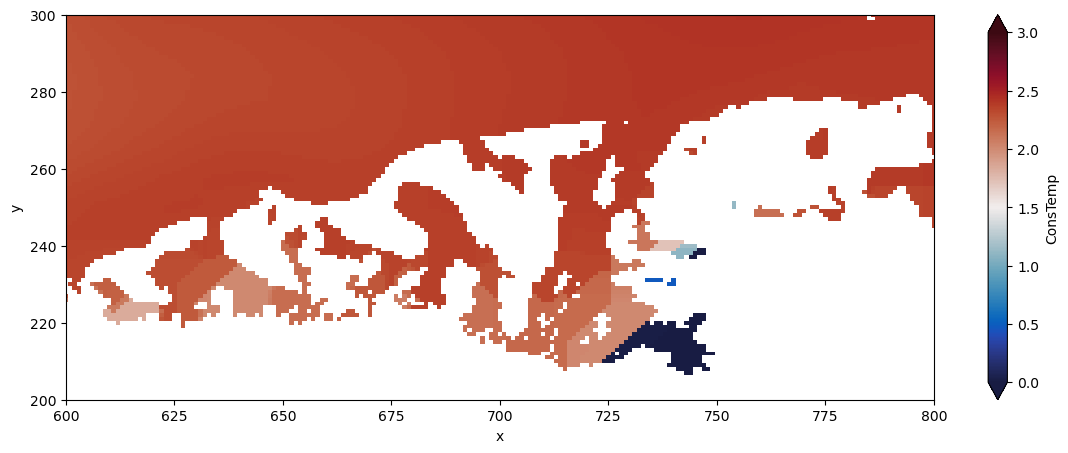

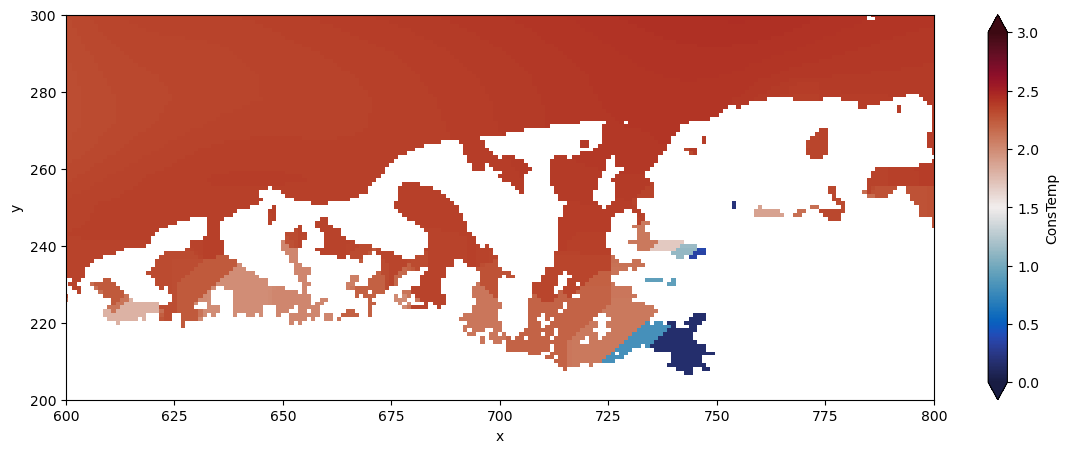

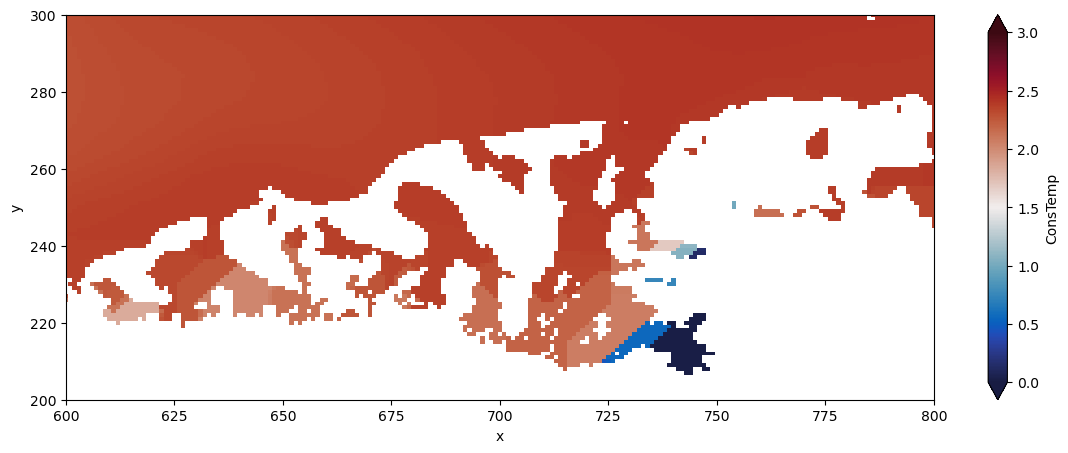

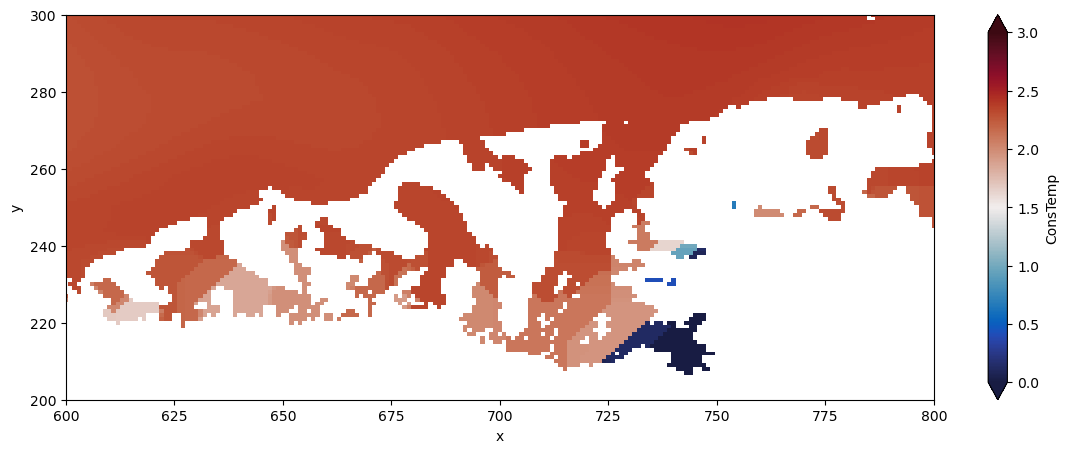

In [9]:
enss=['1011.001', '1031.002', '1051.003', '1071.004', '1091.005']
for ens in enss:
    cesm2_icT = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens{ens}_ICs_ConsTemp_y1850.nc').isel(time_counter=0)
    cesm2_icT_plot = xr.where(cesm2_icT==9999, np.nan, cesm2_icT)
    cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=0, vmax=3, 
                                                    ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

In [20]:
sose_icT = xr.open_dataset(f'{base_folder}initial-conditions/SOSE-ConsTemp-initial-conditions-20240507.nc')

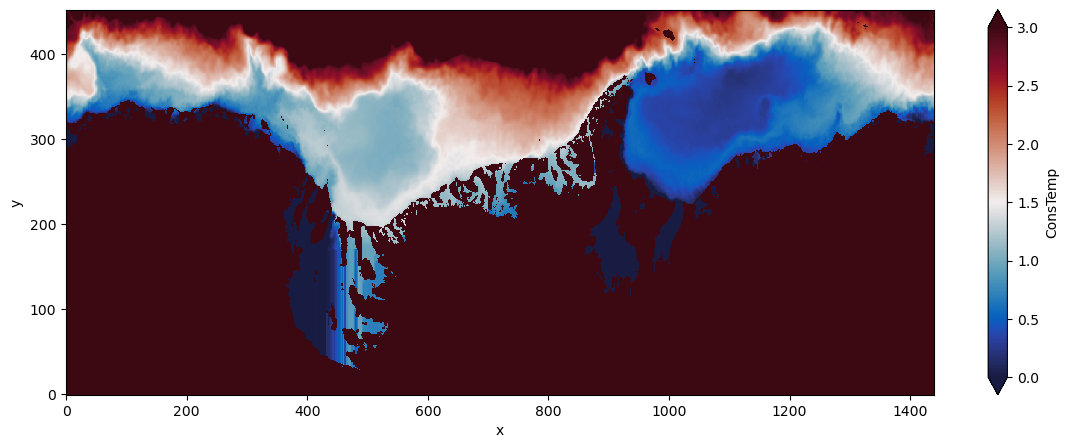

In [21]:
sose_icT['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=0, vmax=3, cmap=cmocean.cm.balance)

In [31]:
cesm2_orT = xr.open_dataset(f'{base_folder}climate-forcing/CESM2/LE2/b.e21.BHISTsmbb.f09_g17.LE2-{ens}.pop.h.TEMP.197001-197912.nc').isel(time=107)

In [39]:
(cesm2_orT.z_t*1e-2).isel(z_t=33)

<xarray.DataArray 'z_t' ()> Size: 4B
array(527.72797, dtype=float32)
Coordinates:
    z_t      float32 4B 5.277e+04
    time     object 8B 1979-01-01 00:00:00

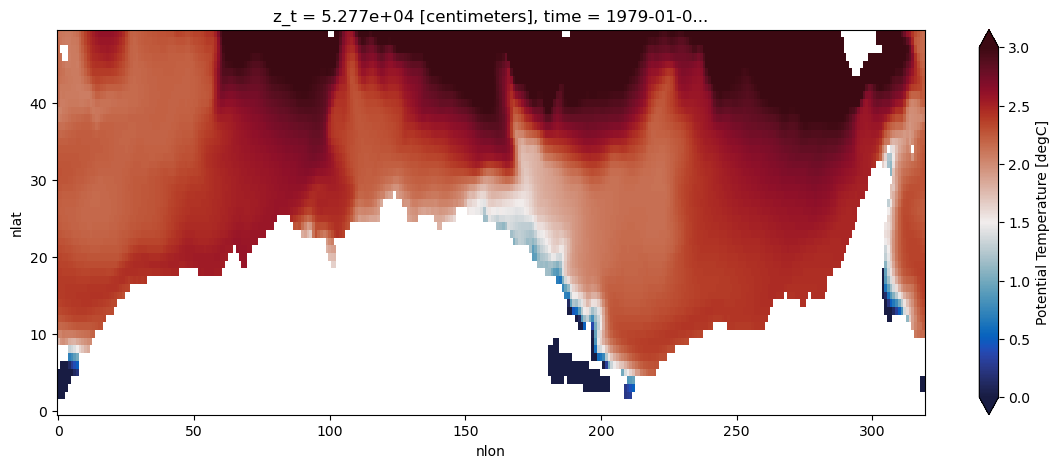

In [44]:
cesm2_orT.TEMP.isel(z_t=33, nlat=slice(0,50)).plot(figsize=(14,5), vmin=0, vmax=3, cmap=cmocean.cm.balance)

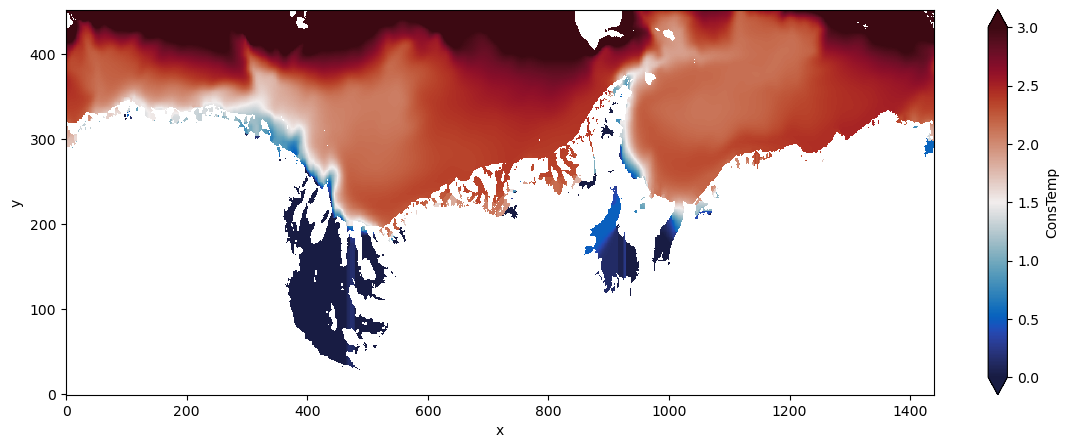

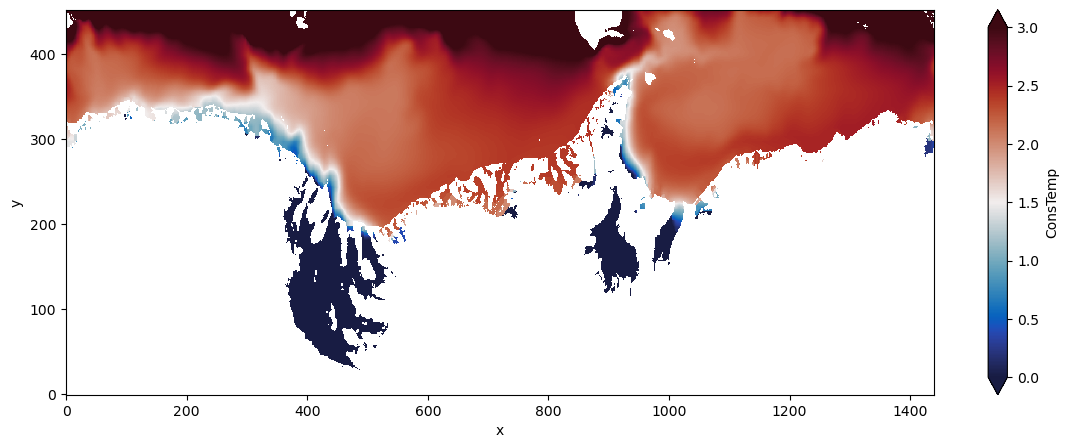

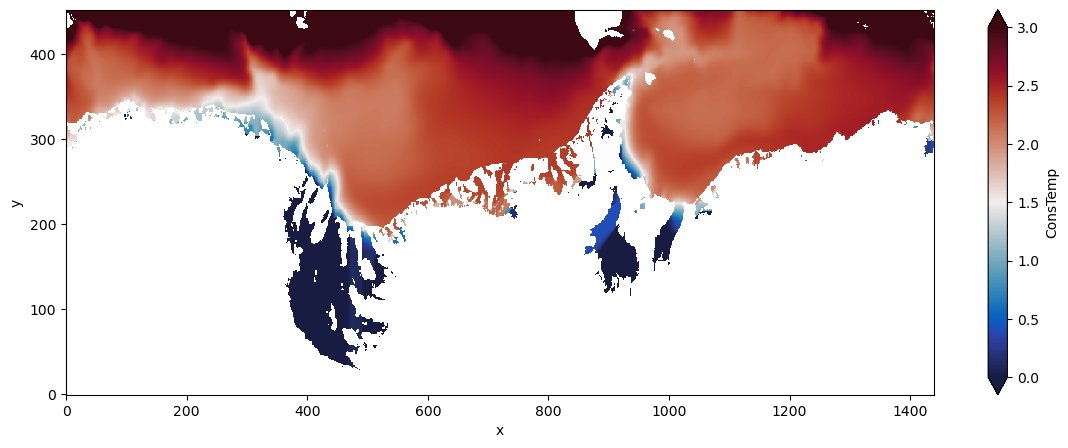

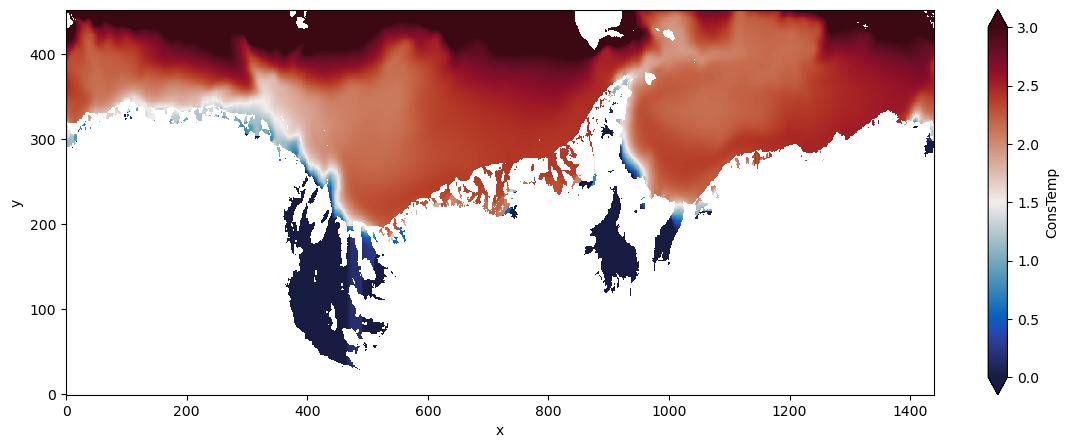

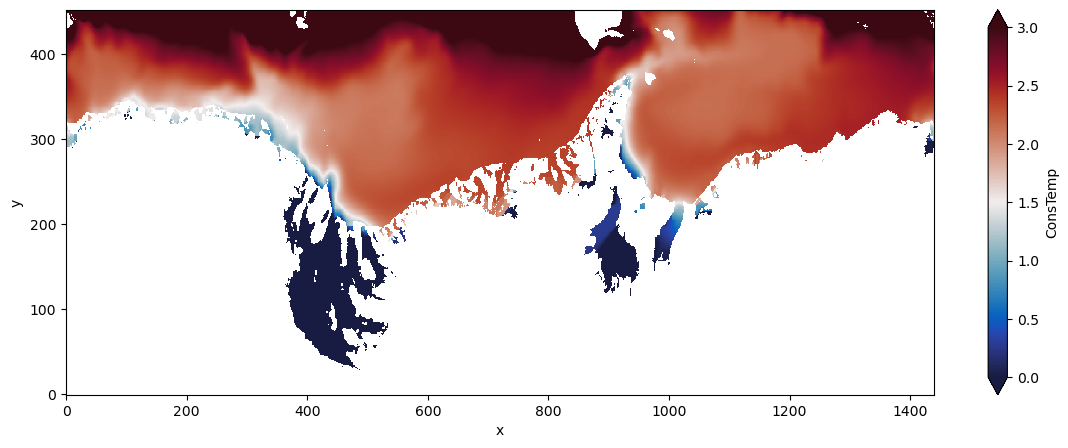

In [19]:
enss=['1011.001', '1031.002', '1051.003', '1071.004', '1091.005']
for ens in enss:
    cesm2_icT = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens{ens}_ICs_ConsTemp_y1850.nc').isel(time_counter=0)
    cesm2_icT_plot = xr.where(cesm2_icT==9999, np.nan, cesm2_icT)
    cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=0, vmax=3, cmap=cmocean.cm.balance)

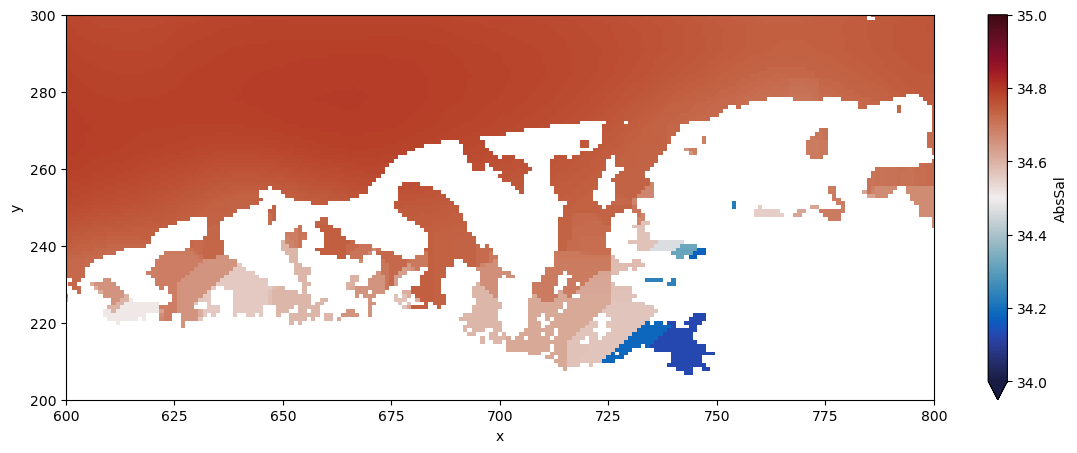

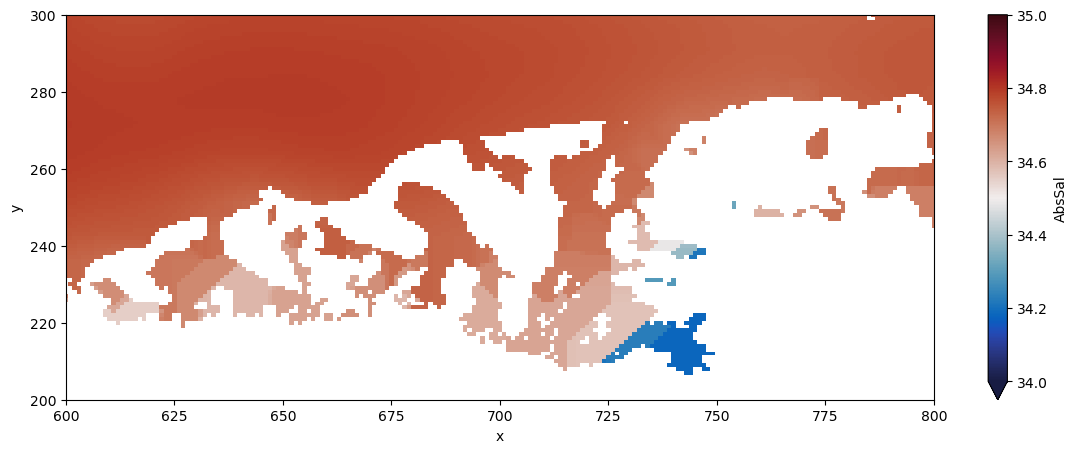

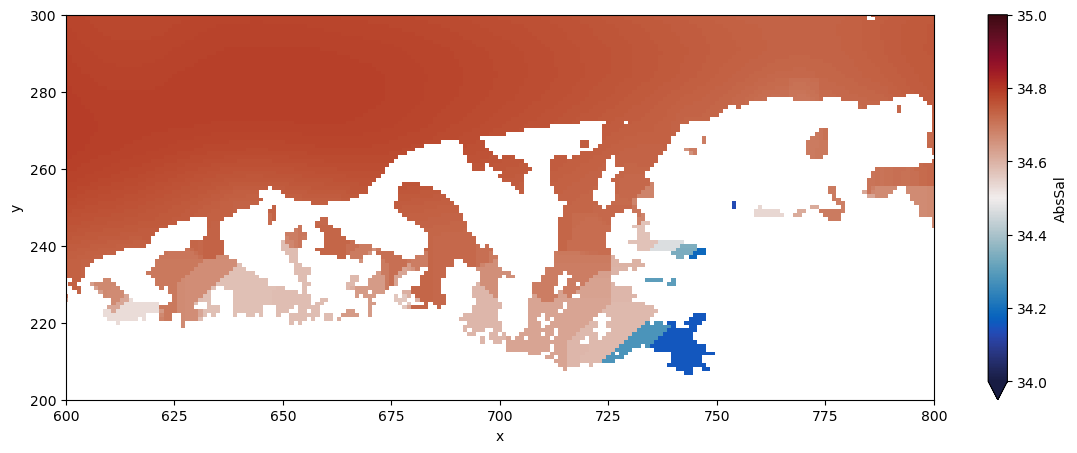

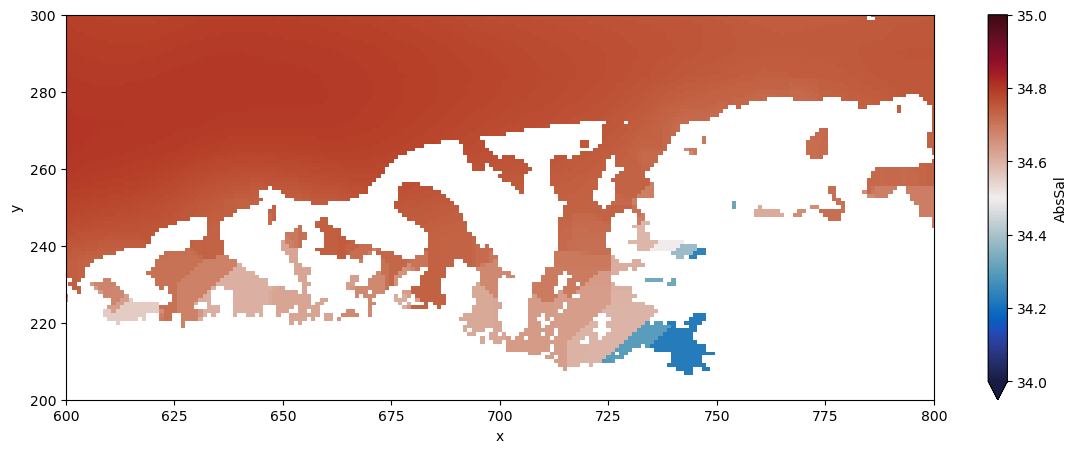

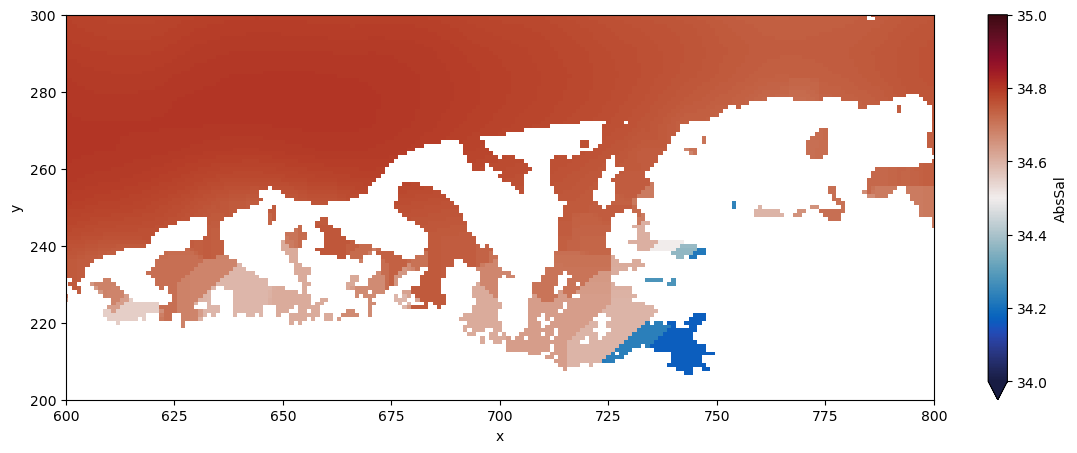

In [15]:
enss=['1011.001', '1031.002', '1051.003', '1071.004', '1091.005']
for ens in enss:
    cesm2_icT = xr.open_dataset(f'{base_folder}initial-conditions/CESM2/CESM2-LE2_ens{ens}_ICs_AbsSal_y1850.nc').isel(time_counter=0)
    cesm2_icT_plot = xr.where(cesm2_icT==9999, np.nan, cesm2_icT)
    cesm2_icT_plot['AbsSal'].isel(deptht=52).plot(figsize=(14,5), vmin=34, vmax=35, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

In [ ]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=-2, vmax=2, 
                                                ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

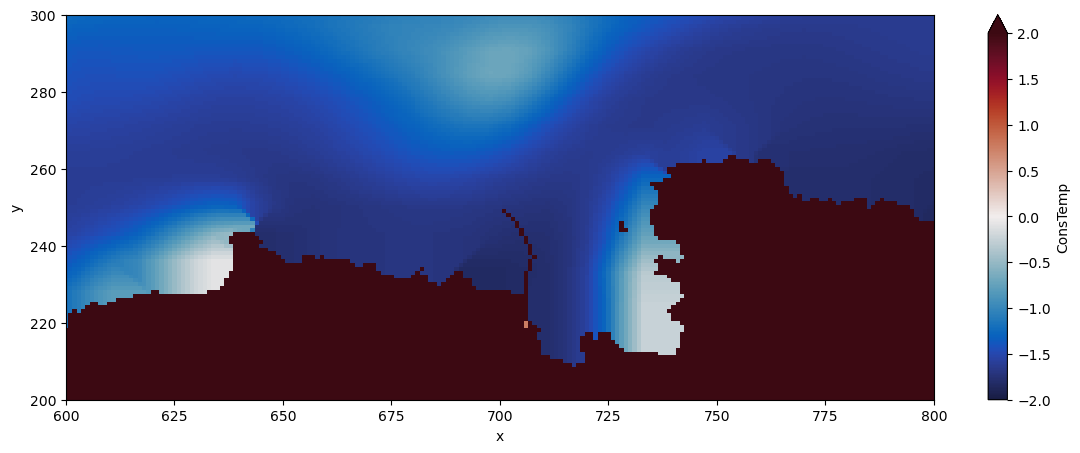

In [21]:
cesm2_icT['ConsTemp'].isel(deptht=0).plot(figsize=(14,5), vmin=-2, vmax=2, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

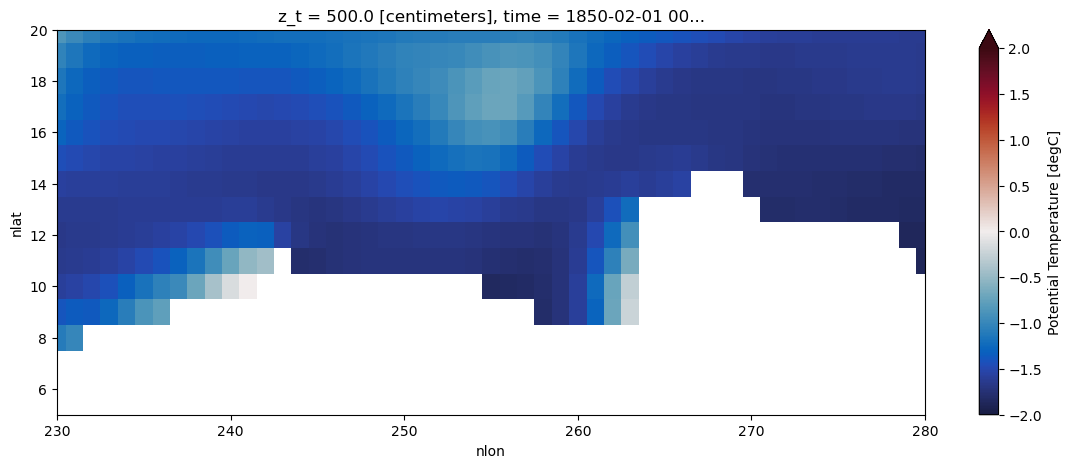

In [24]:
cesm2_orT['TEMP'].isel(z_t=0).plot(figsize=(14,5), ylim=(5,20), xlim=(230, 280), vmin=-2, vmax=2, cmap=cmocean.cm.balance)

In [47]:
cesm2_icT_plot = xr.where(cesm2_icT==9999, np.nan, cesm2_icT)

In [59]:
print((cesm2_orT.z_t.isel(z_t=33)*1e-2).values)
print(nemo_mesh.nav_lev.isel(nav_lev=52).values)

527.72797
530.8942


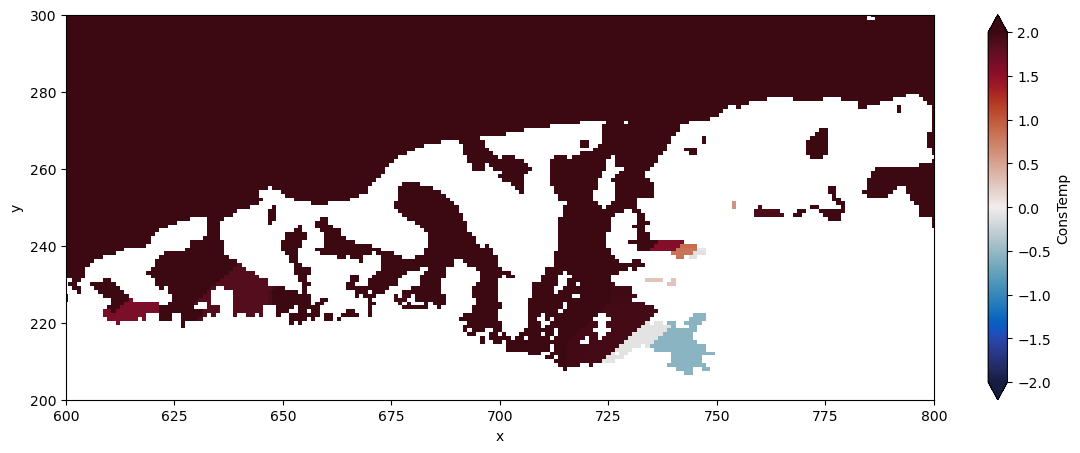

In [60]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=-2, vmax=2, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

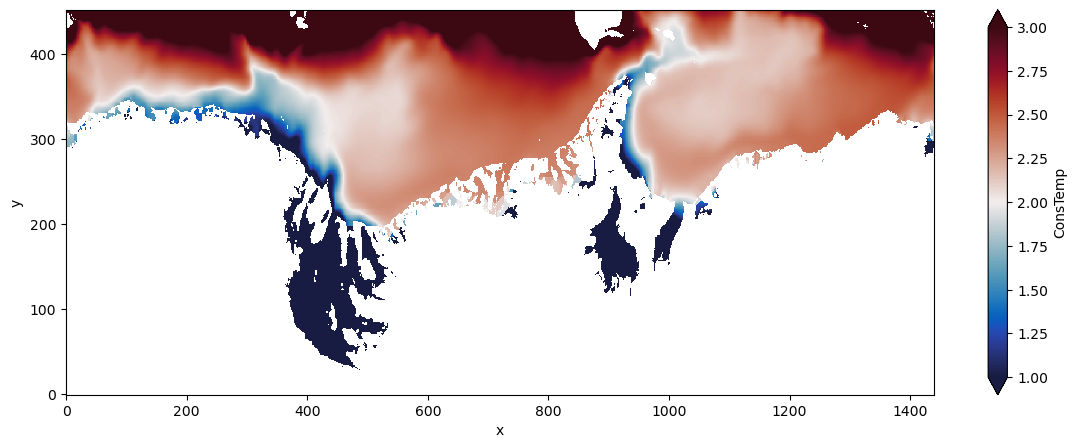

In [70]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=1, vmax=3, cmap=cmocean.cm.balance)

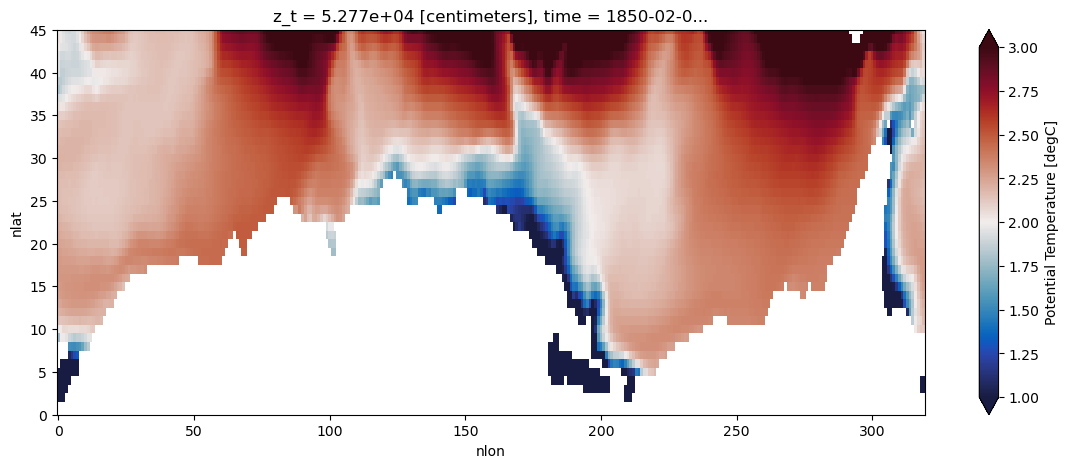

In [74]:
cesm2_orT['TEMP'].isel(z_t=33).plot(figsize=(14,5), ylim=(0,45), vmin=1, vmax=3, cmap=cmocean.cm.balance)

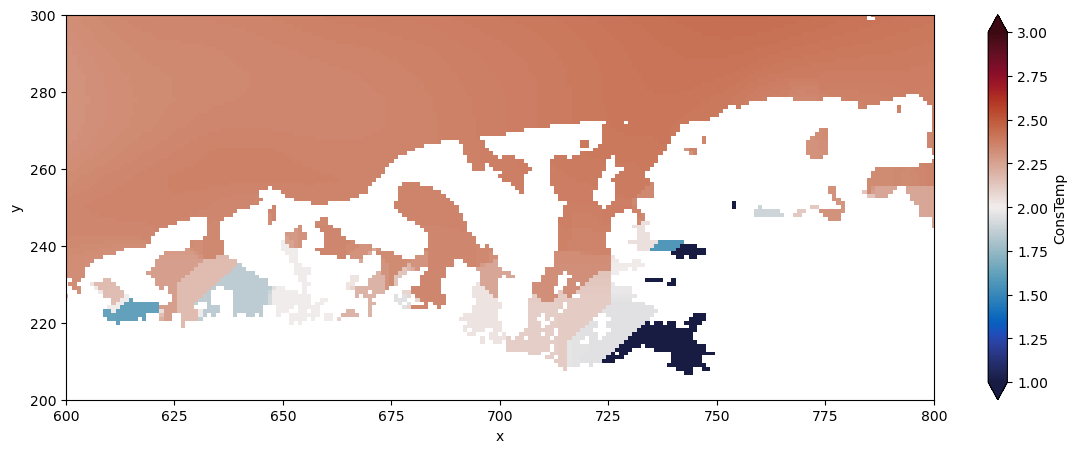

In [69]:
cesm2_icT_plot['ConsTemp'].isel(deptht=52).plot(figsize=(14,5), vmin=1, vmax=3, ylim=(200, 300), xlim=(600, 800), cmap=cmocean.cm.balance)

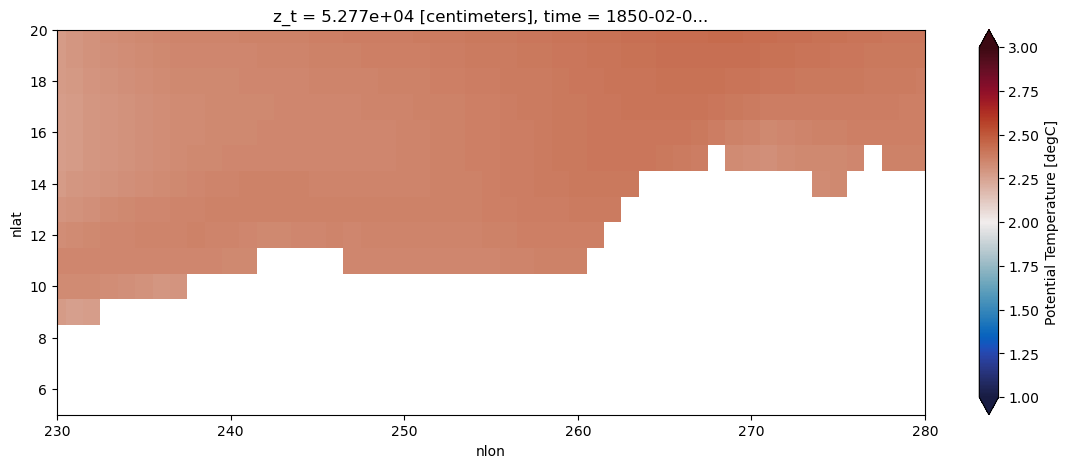

In [68]:
cesm2_orT['TEMP'].isel(z_t=33).plot(figsize=(14,5), ylim=(5,20), xlim=(230, 280), vmin=1, vmax=3, cmap=cmocean.cm.balance)